In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


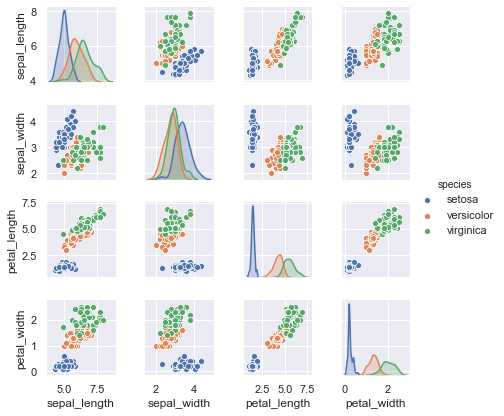

In [4]:
%matplotlib inline
sns.set()
sns.pairplot(iris,hue='species',height=1.5);

In [5]:
X_iris = iris.drop('species',axis=1)
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

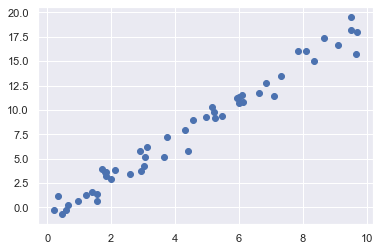

In [8]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y);

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
X.shape

NameError: name 'X' is not defined

In [15]:
X = x[:,np.newaxis]
X.shape

(50, 1)

In [16]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.coef_

array([1.9776566])

In [18]:
model.intercept_

-0.9033107255311164

In [19]:
xfit = np.linspace(-1,11)

In [20]:
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

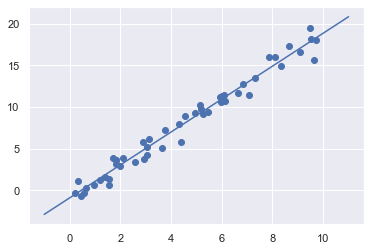

In [21]:
plt.scatter(x,y)
plt.plot(xfit,yfit);

In [22]:
xfit.shape

(50,)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_iris,y_iris,random_state=1)

In [28]:
from sklearn.naive_bayes import GaussianNB #1.选择模型类

model = GaussianNB()                        #2.初始化模型
model.fit(Xtrain,ytrain)                    #3.用模型拟合数据
y_model = model.predict(Xtest)              #4.对新数据进行预测

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,y_model)

0.9736842105263158

In [30]:
from sklearn.decomposition import PCA  #1.选择模型类

model = PCA(n_components=2)             #2.设置超参数，初始化模型
model.fit(X_iris)                       #3.拟合数据，注意这里不用y变量
X_2D = model.transform(X_iris)          #4.将数据转换为二维

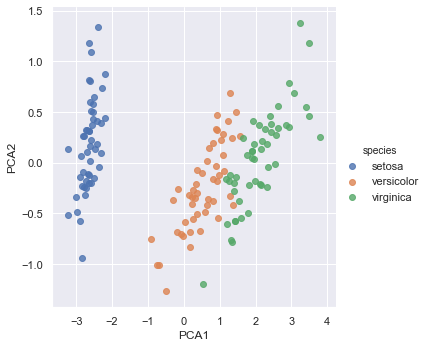

In [31]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1",'PCA2',hue='species',data=iris,fit_reg=False);

In [33]:
from sklearn.mixture import GaussianMixture   #1.选择模型类

model = GaussianMixture(n_components=3,
           covariance_type='full') #2.设置超参数，初始化模型
model.fit(X_iris)                  #3.拟合数据，注意不需要y变量
y_gmm = model.predict(X_iris)      #4.确定簇标签

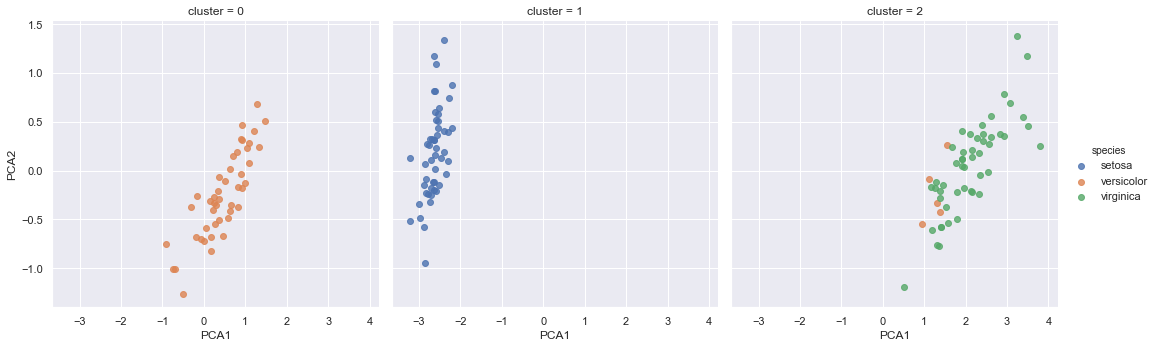

In [34]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1",'PCA2',hue='species',data=iris,col='cluster',fit_reg=False);

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

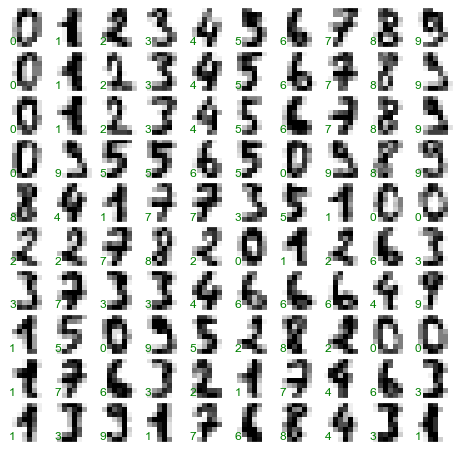

In [36]:
fig,axes = plt.subplots(10,10,figsize=(8,8),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=.1,wspace=.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(.05,.05,str(digits.target[i]),
           transform=ax.transAxes,color='green')

In [37]:
X = digits.data
X.shape

(1797, 64)

In [38]:
y = digits.target
y.shape

(1797,)

In [39]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

In [40]:
data_projected.shape

(1797, 2)

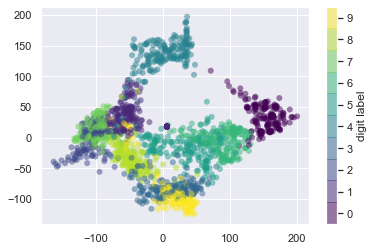

In [42]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=digits.target,
           edgecolor='none',alpha=.5,
           cmap=plt.cm.get_cmap('viridis',10))
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-.5,9.5);

In [43]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=0)

In [44]:
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [45]:
accuracy_score(ytest,y_model)

0.8333333333333334

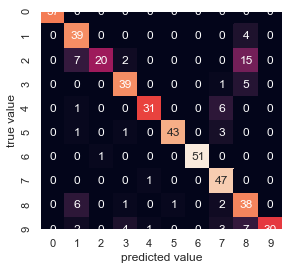

In [46]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest,y_model)

sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

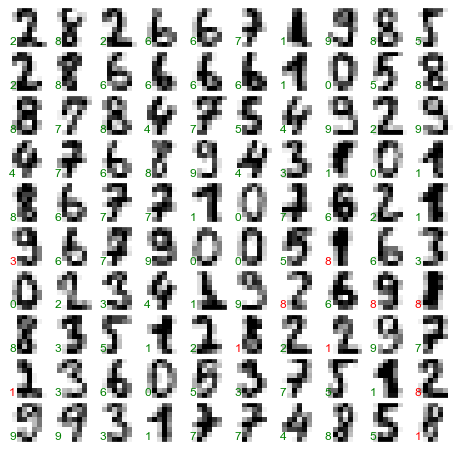

In [49]:
fig,axes = plt.subplots(10,10,figsize=(8,8),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=.1,wspace=.1))

test_images = Xtest.reshape(-1,8,8)

for i,ax in enumerate(axes.flat):
    ax.imshow(test_images[i],cmap='binary',interpolation='nearest')
    ax.text(.05,.05,str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')